In [4]:
from Models.Seq2seq import trainer_seq2seq

mytrainer = trainer_seq2seq(learning_rate= 0.001)
mytrainer.load(name = 'seq2seq_MoreData_3_22')
# mytrainer.train(epoch= 10,early_stop_patience= 4)
# mytrainer.save(name = 'seq2seq_MoreData_test')

model loaded from save\seq2seq_MoreData_3_22.pt


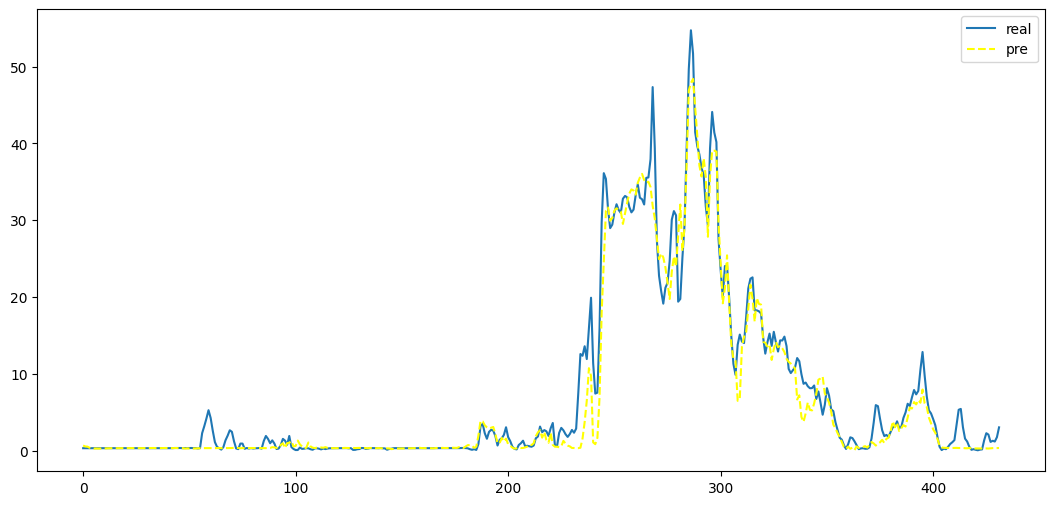

In [5]:
mytrainer.show(index_begin= 200,index_end= 600)